In [1]:
pwd

'C:\\Users\\User\\Desktop\\SecureAire-March-2023\\TDMA_python\\src'

In [2]:
import numpy as np
import threading

from matplotlib import pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk

import tkinter as tk
from tkinter import ttk
from tkinter import filedialog as fd
from tkinter.messagebox import showinfo

import nidaqmx
import CPC
import HV
import DMA

bgColor="dodgerblue"
cColor="white"

In [3]:
from win32api import GetSystemMetrics

windows_Width = GetSystemMetrics(0)
windows_Height = GetSystemMetrics(1)

print("Width =", GetSystemMetrics(0))
print("Height =", GetSystemMetrics(1))


# Default scale
width_default = 1700
height_default = 620

if(width_default>windows_Width):
    scale_width = 0.95 * windows_Width/width_default
else:
    scale_width = 1

if(height_default>windows_Height):
    scale_height = 0.95 * windows_Height/height_default
else:
    scale_height = 1
    
dx0 = -200

Width = 1440
Height = 900


In [4]:
geometry_size = str(int(width_default*scale_width))+'x'+str(int(height_default*scale_height))
geometry_size

'1368x620'

In [5]:
import time
from datetime import datetime
import matplotlib.image as mpimg
from matplotlib.figure import Figure

In [6]:
print(datetime.now())

2023-03-29 14:16:36.137998


In [7]:
def save_data(tydata,outpath,filename):
    date_time = str(datetime.now()).replace(":","_")
    save_file_name = date_time+filename
    np.savetxt(save_file_name, tydata, delimiter=',')
def Plot_TDMA_diagram(frameFig):
    fig, ax = plt.subplots(num=None, figsize=(8, 8), dpi=100)
    img = mpimg.imread('Figures/tDMA.png')
    ax.imshow(img)
    plt.axis('off')
    #plt.axis("tight")  # gets rid of white border
    plt.axis("image")  # square up the image instead of filling the "figure" space
    plt.show()
    canvas = FigureCanvasTkAgg(fig, frameFig)
    canvas.get_tk_widget().pack()

In [8]:
class MyGUI:
    def __init__(self):
        
        self.create_window()
        self.Initialize_global_variables()
        self.add_widgets()
        
        # Generate DMA class
        self.dma1 = DMA.DMAscan(1, entriesDAQ1,entriesScan1,entriesHV1,entriesFileName,entriesDMA1)
        self.dma2 = DMA.DMAscan(2, entriesDAQ2,entriesScan2,entriesHV2,entriesFileName,entriesDMA2)
        
        self.Buttons()
        
        self.update()
        
    def create_window(self):
        self.window = tk.Tk()
        self.window.title("TDMA Charge Distributions")
        self.window.geometry(geometry_size)
        self.window.configure(bg=bgColor)
    
    def Initialize_global_variables(self):
        self.Dp_fix = 1e-09
        self.V_fix = 100
        self.scanDMA1 = True
    
    # Drop Menu Plot results: function to change plot type
    def define_plot_option(self,plot_opt):
        if(self.scanDMA1):
            if(plot_opt == "Voltage"):
                self.dma1.xflag = 0
            elif(plot_opt == "Diameter"):
                self.dma1.xflag = 1
            elif(plot_opt == "Mobility"):
                self.dma1.xflag = 2
            elif(plot_opt == "Charges"):
                self.dma1.xflag = 3
            self.dma1.updateFlag = 1
        else:
            if(plot_opt == "Voltage"):
                self.dma2.xflag = 0
            elif(plot_opt == "Diameter"):
                self.dma2.xflag = 1
            elif(plot_opt == "Mobility"):
                self.dma2.xflag = 2
            elif(plot_opt == "Charges"):
                self.dma2.xflag = 3
            self.dma2.updateFlag = 1
            
    def add_widgets(self):
        plot_options = ["Diameter", "Voltage", "Mobility", "Charges"]
        var_plot_options = tk.StringVar()
        var_plot_options.set("Voltage")
        DropMenu_plot_options = tk.OptionMenu(window, var_plot_options, *plot_options, command=define_plot_option)
        DropMenu_plot_options.place(x=(620+dx0)*scale_width,
                                    y=560*scale_height)

        # Frame setting
        self.frameDAQ=tk.LabelFrame(self.window,text="DAQ settings",font=("",15),background=bgColor,foreground="white")
        self.frameScan1=tk.LabelFrame(self.window,text="Scan1 mode",font=("",15),background=bgColor,foreground="white")
        self.frameScan2=tk.LabelFrame(self.window,text="Scan2 mode",font=("",15),background=bgColor,foreground="white")
        self.frameHV1=tk.LabelFrame(self.window,text="HV1 parameters",font=("",15),background=bgColor,foreground="white")
        self.frameHV2=tk.LabelFrame(self.window,text="HV2 parameters",font=("",15),background=bgColor,foreground="white")
        self.frameFile=tk.LabelFrame(self.window,text="File setting",font=("",15),background=bgColor,foreground="white")
        self.frameFix1=tk.LabelFrame(self.window,text="Fixed DMA1",font=("",15),background=bgColor,foreground="white")
        self.frameFix2=tk.LabelFrame(self.window,text="Fixed DMA2",font=("",15),background=bgColor,foreground="white")
        self.frameDMA1=tk.LabelFrame(self.window,text="DMA1 parameters",font=("",15),background=bgColor,foreground="white")
        self.frameDMA2=tk.LabelFrame(self.window,text="DMA2 parameters",font=("",15),background=bgColor,foreground="white")
        self.frameFig=tk.LabelFrame(self.window,background=bgColor,bd=0)

        # Location of the frames
        dy = 100
        dx = 450
        self.frameDAQ.place(x=10*scale_width,
                            y=10*scale_height,
                            width=195*scale_width,
                            height=300*scale_height)
        self.frameScan1.place(x=(1000+dx0)*scale_width,
                              y=10*scale_height,
                              width=195*scale_width,
                              height=305*scale_height)
        self.frameScan2.place(x=(1220+dx0)*scale_width,
                              y=10*scale_height,
                              width=195*scale_width,
                              height=305*scale_height)
        self.frameHV1.place(x=(1000+dx0)*scale_width,
                            y=(215+dy)*scale_height,
                            width=195*scale_width,
                            height=100*scale_height)
        self.frameHV2.place(x=(1220+dx0)*scale_width,
                            y=(215+dy)*scale_height,
                            width=195*scale_width,
                            height=100*scale_height)
        self.frameFile.place(x=(1000+dx+dx0)*scale_width,
                             y=500*scale_height,
                             width=405*scale_width,
                             height=70*scale_height)
        self.frameFix1.place(x=(1000+dx+dx0)*scale_width,
                             y=(215+dy)*scale_height,
                             width=195*scale_width,
                             height=170*scale_height)
        self.frameFix2.place(x=(1220+dx+dx0)*scale_width,
                             y=(215+dy)*scale_height,
                             width=195*scale_width,
                             height=170*scale_height)
        self.frameDMA1.place(x=(1000+dx0)*scale_width,
                             y=(320+dy)*scale_height,
                             width=195*scale_width,
                             height=170*scale_height)
        self.frameDMA2.place(x=(1220+dx0)*scale_width,
                             y=(320+dy)*scale_height,
                             width=195*scale_width,
                             height=170*scale_height)
        self.frameFig.place(x=(1000+dx+dx0)*scale_width,
                            y=30*scale_height,
                            width=400*scale_width,
                            height=280*scale_height)
    
        # Labels for variables
        labelsDAQ=np.array(["CPC connection","V_CPC min","V_CPC max",
                            "HV1 connection","V_HV1 min","V_HV1 max",
                            "HV2 connection","V_HV2 min","V_HV2 max"])
        labelsScan=np.array(["Min voltage","Max voltage","Time per a bin","Number of bins","Delay time","HV mode","CPC mode"])
        labelsHV=np.array(["      Slope      ","Bias"])
        labelsFix=np.array(["      Voltage      ","CPC mode"])
        labelsDMA=np.array(["Lenght","Inner radius","Outer radius","Sheath flow","Aerosol flow"])

        # Units of variables
        unitsDAQ=np.array([" ","V","V"," ","V","V"," ","V","V"])
        unitsScan=np.array(["V","V","s"," ","s"," "," "])
        unitsHV=np.array([" ","V"])
        unitsFix=np.array(["V"," "])
        unitsDMA=np.array(["mm","mm","mm","L/min","L/min"])

        # Initial values
        initialsDAQ=np.array(["Dev33/ai0",0,10,"Dev33/ao1",0,5,"Dev33/ao0",0,10])
        initialsScan1=np.array([10,1000,5,10,2,0,-1])
        initialsScan2=np.array([10,1000,5,10,2,0,-1])
        initialsHV1=np.array([1000,0])
        initialsHV2=np.array([955,0])
        initialsFix1=np.array([10,-1])
        initialsFix2=np.array([10,-1])
        initialsDMA1=np.array([443, 9.37, 19.61, 4.1, 1.5])
        initialsDMA2=np.array([443,   9.37, 19.61, 7, 1.5])

        # Initialize entries
        self.entriesDAQ1=[]
        self.entriesDAQ2=[]
        self.entriesScan1=[]
        self.entriesScan2=[]
        self.entriesHV1=[]
        self.entriesHV2=[]
        self.entriesFix1=[]
        self.entriesFix2=[]
        self.entriesDMA1=[]
        self.entriesDMA2=[]

        # Arrange labels, entries, and units in frames
        for i in np.arange(np.size(labelsDAQ)-3):
            label = tk.Label(frameDAQ,text=labelsDAQ[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=0)
            self.entriesDAQ1=np.append(self.entriesDAQ1,tk.Entry(frameDAQ,width=10))
            self.entriesDAQ1[i].grid(row=[i],column=1,sticky=tk.EW)
            self.entriesDAQ1[i].delete(0,tk.END)
            self.entriesDAQ1[i].insert(tk.END,initialsDAQ[i])
            label = tk.Label(frameDAQ,text=unitsDAQ[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=2)
        j=0
        for i in np.append(np.arange(3), np.arange(np.size(labelsDAQ)-3,np.size(labelsDAQ))):
            label = tk.Label(frameDAQ,text=labelsDAQ[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=0)
            self.entriesDAQ2=np.append(self.entriesDAQ2,tk.Entry(frameDAQ,width=10))
            self.entriesDAQ2[j].grid(row=[i],column=1,sticky=tk.EW)
            self.entriesDAQ2[j].delete(0,tk.END)
            self.entriesDAQ2[j].insert(tk.END,initialsDAQ[i])
            label = tk.Label(frameDAQ,text=unitsDAQ[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=2)
            j = j+1
        for i in np.arange(np.size(labelsScan)):
            label = tk.Label(frameScan1,text=labelsScan[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=0)
            self.entriesScan1=np.append(self.entriesScan1,tk.Entry(frameScan1,width=10))
            self.entriesScan1[i].grid(row=[i],column=1,sticky=tk.EW)
            self.entriesScan1[i].delete(0,tk.END)
            self.entriesScan1[i].insert(tk.END,initialsScan1[i])
            label = tk.Label(frameScan1,text=unitsScan[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=2)
        for i in np.arange(np.size(labelsScan)):
            label = tk.Label(frameScan2,text=labelsScan[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=0)
            self.entriesScan2=np.append(self.entriesScan2,tk.Entry(frameScan2,width=10))
            self.entriesScan2[i].grid(row=[i],column=1,sticky=tk.EW)
            self.entriesScan2[i].delete(0,tk.END)
            self.entriesScan2[i].insert(tk.END,initialsScan2[i])
            label = tk.Label(frameScan2,text=unitsScan[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=2)
        for i in np.arange(np.size(labelsHV)):
            label = tk.Label(frameHV1,text=labelsHV[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=0)
            self.entriesHV1=np.append(self.entriesHV1,tk.Entry(frameHV1,width=10))
            self.entriesHV1[i].grid(row=[i],column=1,sticky=tk.EW)
            self.entriesHV1[i].delete(0,tk.END)
            self.entriesHV1[i].insert(tk.END,initialsHV1[i])
            label = tk.Label(frameHV1,text=unitsHV[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=2)
        for i in np.arange(np.size(labelsHV)):
            label = tk.Label(frameHV2,text=labelsHV[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=0)
            self.entriesHV2=np.append(self.entriesHV2,tk.Entry(frameHV2,width=10))
            self.entriesHV2[i].grid(row=[i],column=1,sticky=tk.EW)
            self.entriesHV2[i].delete(0,tk.END)
            self.entriesHV2[i].insert(tk.END,initialsHV2[i])
            label = tk.Label(frameHV2,text=unitsHV[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=2)
        for i in np.arange(np.size(labelsFix)):
            label = tk.Label(frameFix1,text=labelsFix[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=0)
            self.entriesFix1=np.append(self.entriesFix1,tk.Entry(frameFix1,width=10))
            self.entriesFix1[i].grid(row=[i],column=1,sticky=tk.EW)
            self.entriesFix1[i].delete(0,tk.END)
            self.entriesFix1[i].insert(tk.END,initialsFix1[i])
            label = tk.Label(frameFix1,text=unitsFix[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=2)
        for i in np.arange(np.size(labelsFix)):
            label = tk.Label(frameFix2,text=labelsFix[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=0)
            self.entriesFix2=np.append(self.entriesFix2,tk.Entry(frameFix2,width=10))
            self.entriesFix2[i].grid(row=[i],column=1,sticky=tk.EW)
            self.entriesFix2[i].delete(0,tk.END)
            self.entriesFix2[i].insert(tk.END,initialsFix2[i])
            label = tk.Label(frameFix2,text=unitsFix[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=2)
        for i in np.arange(np.size(labelsDMA)):
            label = tk.Label(frameDMA1,text=labelsDMA[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=0)
            self.entriesDMA1=np.append(self.entriesDMA1,tk.Entry(frameDMA1,width=10))
            self.entriesDMA1[i].grid(row=[i],column=1,sticky=tk.EW)
            self.entriesDMA1[i].delete(0,tk.END)
            self.entriesDMA1[i].insert(tk.END,initialsDMA1[i])
            label = tk.Label(frameDMA1,text=unitsDMA[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=2)
        for i in np.arange(np.size(labelsDMA)):
            label = tk.Label(frameDMA2,text=labelsDMA[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=0)
            self.entriesDMA2=np.append(self.entriesDMA2,tk.Entry(frameDMA2,width=10))
            self.entriesDMA2[i].grid(row=[i],column=1,sticky=tk.EW)
            self.entriesDMA2[i].delete(0,tk.END)
            self.entriesDMA2[i].insert(tk.END,initialsDMA2[i])
            label = tk.Label(frameDMA2,text=unitsDMA[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=2)

        # File control
        self.entriesFileName=tk.Entry(frameFile,width=50)
        self.entriesFileName.grid(row=0,column=1,sticky=tk.EW)
        self.entriesFileName.delete(0,tk.END)
        self.entriesFileName.insert(tk.END,"")
        for i in [0,2,4]:
            tk.Label(self.frameFile,text=" ",background=bgColor).grid(row=0,column=i)
            
        open_button = tk.Button(self.frameFile,text='Select a File',command=select_file)
        open_button.grid(row=0,column=3,sticky=tk.EW)
    
    def select_file(self):
        filename = fd.askopenfilename(title='Open a file',initialdir='C:/Users/Public/')
        showinfo(title='Selected File',message=filename)
        self.entriesFileName.delete(0,tk.END)
        self.entriesFileName.insert(tk.END,filename)

    # function to stop/start scan
    def DMA_scan_status1(self):
        self.window.configure(bg="green")
        self.dma1.scan(Dp_fix,V_fix)
        self.window.configure(bg=bgColor)
    def DMA_scan_status2(self):
        self.scanDMA1 = False
        self.window.configure(bg="green")
        self.dma2.scan(Dp_fix,V_fix)
        self.window.configure(bg=bgColor)
    def DMA_fixV_status1(self):
        self.window.configure(bg="green")
        self.dma1.hv.HVout(float(self.entriesFix1[0].get()))
    def DMA_fixV_status2(self):
        self.window.configure(bg="green")
        self.dma2.hv.HVout(float(self.entriesFix2[0].get()))
    def stopScan1(self):
        self.dma1.stop=1
        self.window.configure(bg=bgColor)
    def stopScan2(self):
        self.dma2.stop=1
        self.window.configure(bg=bgColor)
    def startScan1(self):
        self.scanDMA1 = True
        self.dma1.setVal(self.entriesDAQ1,
                         self.entriesScan1,
                         self.entriesHV1,
                         self.entriesFileName,
                         self.entriesDMA1)
        self.thread = threading.Thread(target=self.DMA_scan_status1)
        self.thread.start()
    def startScan2(self):
        self.scanDMA1 = False
        self.dma2.setVal(self.entriesDAQ2,
                         self.entriesScan2,
                         self.entriesHV2,
                         self.entriesFileName,
                         self.entriesDMA2)
        self.thread = threading.Thread(target=self.DMA_scan_status2)
        self.thread.start()
    def startFixV1(self):
        self.dma1.setVal(self.entriesDAQ1,
                         self.entriesScan1,
                         self.entriesHV1,
                         self.entriesFileName,
                         self.entriesDMA1)
        self.dma1.cpc.mode=int(self.entriesFix1[1].get())
        self.Dp_fix = self.dma1.VtoDp(float(self.entriesFix1[0].get()))
        self.V_fix = float(self.entriesFix1[0].get())
        self.thread = threading.Thread(target=self.DMA_fixV_status1)
        self.thread.start()
    def startFixV2(self):
        self.dma2.setVal(self.entriesDAQ2,
                         self.entriesScan2,
                         self.entriesHV2,
                         self.entriesFileName,
                         self.entriesDMA2)
        self.dma2.cpc.mode=int(self.entriesFix2[1].get())
        self.Dp_fix = self.dma2.VtoDp(float(self.entriesFix2[0].get()))
        self.V_fix = float(self.entriesFix2[0].get())
        self.thread = threading.Thread(target=self.DMA_fixV_status2)
        self.thread.start()

    def Buttons(self):
        # generate stop/start buttons
        # SCAN Stop-1/start-1
        stop1=tk.Button(self.frameScan1,text="Stop",background="blue4",foreground=cColor,width=20,height=2,
                    command=lambda:self.stopScan1())
        stop1.grid(row=np.size(labelsScan)+1,column=0,columnspan=3)
        start1=tk.Button(frameScan1,text="Start DMA1 scan",background="blue4",foreground=cColor,width=20,height=2,
                     command=lambda:self.startScan1())
        start1.grid(row=np.size(labelsScan),column=0,columnspan=3)
        # SCAN Stop-2/start-2
        stop2=tk.Button(frameScan2,text="Stop",background="blue4",foreground=cColor,width=20,height=2,
                    command=lambda:self.stopScan2())
        stop2.grid(row=np.size(labelsScan)+1,column=0,columnspan=3)
        start2=tk.Button(frameScan2,text="Start DMA2 scan",background="blue4",foreground=cColor,width=20,height=2,
                     command=lambda:self.startScan2())
        start2.grid(row=np.size(labelsScan),column=0,columnspan=3)
        # FIX Stop-1/start-1
        stopFix1=tk.Button(frameFix1,text="Stop",background="blue4",foreground=cColor,width=20,height=2,
                       command=lambda:self.stopScan1())
        stopFix1.grid(row=np.size(labelsFix)+1,column=0,columnspan=3)
        startFix1=tk.Button(frameFix1,text="Start",background="blue4",foreground=cColor,width=20,height=2,
                        command=lambda:self.startFixV1())
        startFix1.grid(row=np.size(labelsFix),column=0,columnspan=3)
        # FIX Stop-2/start-2
        stopFix2=tk.Button(frameFix2,text="Stop",background="blue4",foreground=cColor,width=20,height=2,
                       command=lambda:self.stopScan2())
        stopFix2.grid(row=np.size(labelsFix)+1,column=0,columnspan=3)
        startFix2=tk.Button(frameFix2,text="Start",background="blue4",foreground=cColor,width=20,height=2,
                        command=lambda:self.startFixV2())
        startFix2.grid(row=np.size(labelsFix),column=0,columnspan=3)

        self.frameDAQ.grid_columnconfigure(1, weight=1)
        self.frameDAQ.grid_rowconfigure(list(range(np.size(labelsDAQ))), weight=1)
        self.frameScan1.grid_columnconfigure(1, weight=1)
        self.frameScan1.grid_rowconfigure(list(range(np.size(labelsScan)+2)), weight=1)
        self.frameScan2.grid_columnconfigure(1, weight=1)
        self.frameScan2.grid_rowconfigure(list(range(np.size(labelsScan)+2)), weight=1)
        self.frameHV1.grid_columnconfigure(1, weight=1)
        self.frameHV1.grid_rowconfigure(list(range(np.size(labelsHV))), weight=1)
        self.frameHV2.grid_columnconfigure(1, weight=1)
        self.frameHV2.grid_rowconfigure(list(range(np.size(labelsHV))), weight=1)
        self.frameFile.grid_columnconfigure(1, weight=1)
        self.frameFile.grid_rowconfigure(list(range(1)), weight=1)
        self.frameFix1.grid_columnconfigure(1, weight=1)
        self.frameFix1.grid_rowconfigure(list(range(np.size(labelsFix)+2)), weight=1)
        self.frameFix2.grid_columnconfigure(1, weight=1)
        self.frameFix2.grid_rowconfigure(list(range(np.size(labelsFix)+2)), weight=1)
        self.frameDMA1.grid_columnconfigure(1, weight=1)
        self.frameDMA1.grid_rowconfigure(list(range(np.size(labelsDMA))), weight=1)
        self.frameDMA2.grid_columnconfigure(1, weight=1)
        self.frameDMA2.grid_rowconfigure(list(range(np.size(labelsDMA))), weight=1)
    
        # Plot TDMA diagram
        Plot_TDMA_diagram(self.frameFig)

    def update(self):
        if(self.scanDMA1):
            if(self.dma1.updateFlag):
                self.dma1.figUpdate(self.window,
                                    scale_width,
                                    scale_height)
                self.dma1.updateFlag=0
        else:
            if(self.dma2.updateFlag):
                self.dma2.figUpdate(self.window,
                                    scale_width,
                                    scale_height)
                self.dma2.updateFlag=0
        self.window.after(1000, update)

    #window.mainloop()


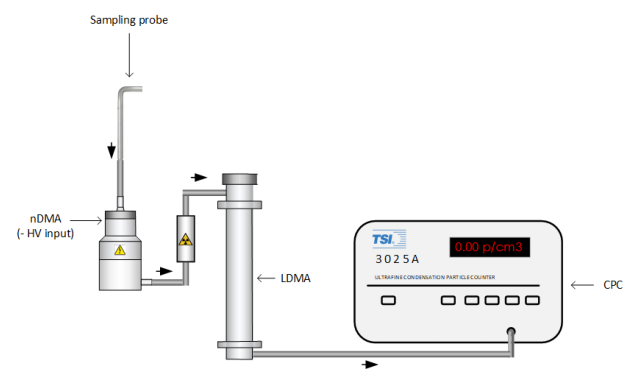

0.7015706806282722


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x22779c17880>


0.01
4.942148443828308
0.22
1.4809662700331578
0.43
0.7678780467135133
0.64
0.5793250676950277
0.85
0.3250931154287341
1.06
1.1416287654280264
1.27
1.6733137032381753
1.48
2.9923207168239156
1.69
3.906533123982898
1.9
4.301983975019539
2.11
4.013509362869431
2.32
3.7917018316338456
2.53
4.233413126584223
2.74
4.554939537698027
2.95
4.696956368626931
3.16
4.9799410465310245
3.37
4.990916387034762
3.58
5.044852777318681
3.79
5.0298721796180486
4.0
4.962503260518669
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2277b3fbb20>
C:\Users\User\Desktop\SecureAire-March-2023\TDMA_python\src\DMA.py:50: RuntimeWarning: divide by zero encountered in double_scalars
  self.Zp=self.coeff/x
C:\Users\User\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:790: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2277fbe4580>


0.0
0.01
0.2641111565292969
0.22
0.12430285679407282
0.43
0.35416216998598604
0.64
0.32188455733967697
0.85
0.46196017791863964
1.06
0.9924571384677072
1.27
1.3914367577578024
1.48
2.577104506207194
1.69
3.49085981181028
1.9
4.142166735207486
2.11
4.086939653203223
2.32
4.310638048488036
2.53
3.969318481958255
2.74
4.531714392420006
2.95
4.768831491596424
3.16
4.874106753105052
3.37
4.957825823499454
3.58
5.049556996105344
3.79
5.113158793773296
4.0
5.04678999967963
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2270051ef40>


0.31413612565445026


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x227047b9100>


0.01
0.17785098601384228
0.22
0.20715964799162062
0.43
0.48499248144197704
0.64
1.2825055495276172
0.85
2.934427870994666
1.06
3.0884388397924267
1.27
3.5026768173516696
1.48
4.6765779057755035
1.69
4.940469063282744
1.9
4.923591741598655
2.11
4.400778642176905
2.32
3.739142956009529
2.53
3.1266268868057523
2.74
2.7556382409477838
2.95
1.9760368883154587
3.16
2.8055371750069726
3.37
2.7428109532336746
3.58
3.202222154407384
3.79
2.800787818401184
4.0
2.7753264371399804
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x22703761e80>


0.31413612565445026


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2270033c160>


0.01
0.288355100742202
0.22
2.1458884005544414
0.43
4.957488788589525
0.64
3.604734980462596
0.85
1.9013605456799358
1.06
0.4715646697715355
1.27
0.45652849923629696
1.48
0.4566303118653381
1.69
0.40484529918673745
1.9
0.42222566789014493
2.11
0.35908980092356835
2.32
0.28244595593745947
2.53
0.3236991292208142
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x22707047f40>


0.01
0.8367785960975976
0.06210526315789474
0.37124300451031783
0.11421052631578948
1.2163032687401532
0.16631578947368422
4.0132335727390895
0.21842105263157896
5.119456306661806
0.2705263157894737
5.0780041139559815
0.32263157894736844
4.21784302297526
0.3747368421052632
3.137529736125324
0.4268421052631579
3.7238779885002917
0.4789473684210527
3.793445695401005
0.5310526315789474
3.3762007014793824
0.5831578947368421
1.9205909533212038
0.6352631578947369
1.335871804419461
0.6873684210526316
0.8554843118826481
0.7394736842105264
0.8754447346421281
0.791578947368421
0.7836641792085611
0.8436842105263158
0.5291975112330387
0.8957894736842106
0.4644611820314542
0.9478947368421053
0.7335671058387553
1.0
0.11758055835455031
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2270b9ca2e0>


4.18848167539267


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2270bda8a60>


0.01
0.3384835266536948
0.11473684210526316
0.39848025448151025
0.21947368421052632
0.28874379427671865
0.3242105263157895
0.4426283169019362
0.42894736842105263
1.2822103637783056
0.5336842105263159
3.280842927400409
0.638421052631579
4.130452765927264
0.7431578947368422
4.591313900532548
0.8478947368421054
4.627574744212574
0.9526315789473684
4.763399311374036
1.0573684210526317
4.7382836905637244
1.1621052631578948
4.788525464525283
1.266842105263158
4.739029982149996
1.371578947368421
4.86017096142753
1.4763157894736845
4.8476429926550235
1.5810526315789475
4.676558655742433
1.6857894736842107
4.6508351683981415
1.7905263157894737
4.553499285794543
1.895263157894737
4.493356609813767
2.0
4.255132611759055
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2270fe48b20>


0.01
0.4053517078586558
0.11473684210526316
0.5213300905743609
0.21947368421052632
0.4176109845973482
0.3242105263157895
0.20669376830762057
0.42894736842105263
1.4337997253517276
0.5336842105263159
2.9380749140068865
0.638421052631579
3.921387944231047
0.7431578947368422
4.627967939049369
0.8478947368421054
4.623492777289995
0.9526315789473684
4.750922945499446
1.0573684210526317
4.771593212040636
1.1621052631578948
4.8457591446722414
1.266842105263158
4.84786667166606
1.371578947368421
4.895174087094273
1.4763157894736845
4.720307204235456
1.5810526315789475
4.751208711871489
1.6857894736842107
4.666494578964781
1.7905263157894737
4.509784426036718
1.895263157894737
4.553032248408562
2.0
4.451803032880919
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2277b84f640>


0.01
0.187819894194498
0.11473684210526316
0.4306272159462172
0.21947368421052632
0.4653036946255498
0.3242105263157895
0.8512776282507172
0.42894736842105263
2.162183938141514
0.5336842105263159
3.4986665333735303
0.638421052631579
4.122661592105394
0.7431578947368422
4.589794735737643
0.8478947368421054
4.7533983521159335
0.9526315789473684
4.764150869130776
1.0573684210526317
4.825626889319955
1.1621052631578948
4.746296294315258
1.266842105263158
4.83987789891547
1.371578947368421
4.84950822008066
1.4763157894736845
4.775865590721064
1.5810526315789475
4.729255468222003
1.6857894736842107
4.648695849338166
1.7905263157894737
4.4515931195350955
1.895263157894737
4.385045526415551
2.0
4.406083626663772
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x227191e4a60>


0.010471204188481676


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2271ca6d580>


0.01
0.3768361206714417
0.06210526315789474
0.41155824184579615
0.11421052631578948
0.23441278409109145
0.16631578947368422
0.35999571860020296
0.21842105263157896
0.1686204350476146
0.2705263157894737
0.28420260699635946
0.32263157894736844
0.370568627855846
0.3747368421052632
0.3715411265407056
0.4268421052631579
0.5424778633528149
0.4789473684210527
0.48766279414417113
0.5310526315789474
0.3241659736654583
0.5831578947368421
0.28650023560408044
0.6352631578947369
0.4468886770218887
0.6873684210526316
0.4526287299515843
0.7394736842105264
0.44428111469073883
0.791578947368421
0.44389934867808734
0.8436842105263158
0.5713137554005243
0.8957894736842106
0.6584528524356301
0.9478947368421053
0.22580697444800535
1.0
0.29663059767926825
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2271a81cd60>


0.01
0.5086470360445151
0.06210526315789474
0.49349300359881026
0.11421052631578948
0.4181802458909043
0.16631578947368422
0.48848161547379015
0.21842105263157896
0.11139923452820837
0.2705263157894737
0.3436614260735014
0.32263157894736844
0.4111922884503613
0.3747368421052632
0.6462711288857778
0.4268421052631579
0.3345800404870583
0.4789473684210527
0.48126796501320523
0.5310526315789474
0.2777069040566233
0.5831578947368421
0.4020953551225376
0.6352631578947369
0.3220084377306778
0.6873684210526316
0.36915871885770607
0.7394736842105264
0.5820664800842915
0.791578947368421
0.5666496406552489
0.8436842105263158
0.2518063730766104
0.8957894736842106
0.2774972603180066
0.9478947368421053
0.41168530231414185
1.0
0.4820553828831293
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2271e0ae100>


0.04712041884816754


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x22725a97340>


0.01
0.554436093742627
0.06210526315789474
0.8813304561323586
0.11421052631578948
0.4858611781111842
0.16631578947368422
0.4034668210616159
0.21842105263157896
0.4140819067296748
0.2705263157894737
0.3535491779002429
0.32263157894736844
0.2908952346689853
0.3747368421052632
0.47473531843701994
0.4268421052631579
0.3648327766057043
0.4789473684210527
0.4732911299726987
0.5310526315789474
0.40629610844837566
0.5831578947368421
0.4195987667544416
0.6352631578947369
0.29594638898230313
0.6873684210526316
0.17229351045133515
0.7394736842105264
0.3305302960250974
0.791578947368421
0.29289626695172727
0.8436842105263158
0.5501145450439126
0.8957894736842106
0.5223544785709191
0.9478947368421053
0.5309329780793406
1.0
0.37270320312919153
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x22725b1fa00>


0.10157068062827225


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x227262e97c0>


0.01
0.41959776523678255
0.06210526315789474
1.7206271559841066
0.11421052631578948
4.675759849224549
0.16631578947368422
1.6454293451323236
0.21842105263157896
0.8951487291132152
0.2705263157894737
0.5319119992067292
0.32263157894736844
0.4053486891997962
0.3747368421052632
0.4660503970979147
0.4268421052631579
0.3236627742390881
0.4789473684210527
0.40686154039827155
0.5310526315789474
0.34400803184305995
0.5831578947368421
0.4976633020051965
0.6352631578947369
0.3212337600767207
0.6873684210526316
0.35852727784798155
0.7394736842105264
0.5713794544667201
0.791578947368421
0.45466804075793943
0.8436842105263158
0.3811747659422171
0.8957894736842106
0.2846289996352613
0.9478947368421053
0.46350113969097273
1.0
0.4886224187206599
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x22725fec8e0>


0.01
0.7911028537070909
0.02
0.5293852153461022
0.03
0.500364102208976
0.04
1.1360224746765628
0.05
2.71432335469247
0.06
4.640746690402267
0.07
4.909428212281661
0.08
4.821393891344057
0.09
3.919955907694771
0.1
2.0243527092618576
0.11
1.1151142732998776
0.12
1.2223319994010011
0.13
1.1371669890581977
0.14
1.5323594794719892
0.15
1.4848410679522703
0.16
0.8938784396337446
0.17
1.0125749127342012
0.18
0.8799526787571124
0.19
0.48485748711196114
0.2
0.4355811777361378
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2272dc4d4c0>


0.04712041884816754


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x22731095460>


0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2273126f340>


0.001


Exception in thread Thread-29:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "C:\Users\User\anaconda3\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\User\AppData\Local\Temp\ipykernel_7076\2297450087.py", line 258, in DMA_scan_status1
  File "C:\Users\User\Desktop\SecureAire-March-2023\TDMA_python\src\DMA.py", line 134, in scan
    self.cpc.timeOpt()
  File "C:\Users\User\Desktop\SecureAire-March-2023\TDMA_python\src\CPC.py", line 58, in timeOpt
    task.start()
  File "C:\Users\User\anaconda3\lib\site-packages\nidaqmx\task.py", line 1021, in start
    check_for_error(error_code)
  File "C:\Users\User\anaconda3\lib\site-packages\nidaqmx\errors.py", line 193, in check_for_error
    raise DaqError(error_buffer.value.decode("utf-8"), error_code)
nidaqmx.errors.DaqError: The specified resource is reserved. The operation could not be completed as spe

0.39095497311733196
0.006210526315789474
0.25177610513492255
0.011421052631578946
0.2680459277608315
0.01663157894736842
0.41938536938076143
0.021842105263157895
0.9573742137424415
0.027052631578947366
3.4073276212549537
0.03226315789473684
4.019210934281873
0.03747368421052631
3.5371081333520125
0.04268421052631579
2.163307946556888
0.04789473684210526
0.6105236365183373
0.05310526315789473
0.6156018478327314
0.0583157894736842
0.4786547437743866
0.06352631578947368
0.5169438655485282
0.06873684210526315
0.6234377760789357
0.07394736842105264
0.4472454474071856
0.0791578947368421
0.7961831193295075
0.08436842105263158
0.4919180184000288
0.08957894736842105
0.44291694416984684
0.09478947368421052
0.32044769325992095
0.1
0.5376457102800487
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x22731156d60>


0.02198952879581152


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x22736cd7b80>


0.001
0.4657503160352106
0.0035789473684210526
0.5831483019603592
0.006157894736842105
0.585270317888798
0.008736842105263157
0.28888823780954553
0.011315789473684211
0.9018268462595771
0.013894736842105264
1.8786829110261218
0.016473684210526314
1.44954919963829
0.01905263157894737
0.54253459223379
0.021631578947368422
0.679563858582231
0.024210526315789474
0.35936765410824223
0.026789473684210526
0.5637517422779105
0.02936842105263158
0.40578217598993377
0.03194736842105263
0.3425334625133363
0.03452631578947368
0.37593101407909785
0.03710526315789474
0.481624058444827
0.03968421052631579
0.6433667104878603
0.04226315789473684
0.37876170609046833
0.0448421052631579
0.28905123832402024
0.04742105263157895
0.30843525950535555
0.05
0.5376701553418194
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x22736d57b20>


0.01
0.5192064601422106
0.02
1.1780776104911332
0.03
0.6606999344270812
0.04
0.3210795855681941
0.05
0.32857510153380914
0.06
0.46563245412474424
0.07
0.41398386033825785
0.08
0.5032309051035532
0.09
0.5046873773928905
0.1
0.45771413990158394
0.11
0.33394208155040644
0.12
0.6673744293397882
0.13
0.21300823831126747
0.14
0.5426283802221186
0.15
0.4126171637168928
0.16
0.5254145228134977
0.17
0.4895443788281654
0.18
0.49624796306345553
0.19
0.3944704418254318
0.2
0.33784807541726564
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x227310438e0>


0.05
0.40635969386562465
0.06842105263157895
0.5754940932390582
0.08684210526315789
0.4989444821417237
0.10526315789473685
0.40515813557317415
0.1236842105263158
0.16818843666487737
0.14210526315789473
0.3596521291888166
0.1605263157894737
0.33100209691042437
0.17894736842105263
0.39374735038450126
0.19736842105263158
0.29033045382311684
0.21578947368421056
0.4179744224768456
0.23421052631578948
0.4076747773144689
0.25263157894736843
0.4877537147340263
0.2710526315789474
0.21267171199428958
0.2894736842105264
0.372289086531282
0.3078947368421053
0.5427782529259275
0.3263157894736842
0.4021356538651162
0.3447368421052632
0.2041829437735032
0.3631578947368421
0.3318369589012491
0.3815789473684211
0.45952513204065326
0.4
0.23823948604422185
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2273ed44940>


0.2157068062827225


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x227436c64c0>


0.2
1.8424043823691254
0.21578947368421053
2.5211498269527794
0.23157894736842105
2.4803154223391943
0.24736842105263157
2.6325936809515382
0.2631578947368421
2.9727925095512786
0.2789473684210526
3.506730373090318
0.29473684210526313
3.0589857852991966
0.3105263157894737
2.7803977840241276
0.3263157894736842
2.7272693880949643
0.34210526315789475
2.862158662346516
0.35789473684210527
2.0074963447307104
0.3736842105263158
1.3093449485582334
0.3894736842105263
1.2810057791842002
0.4052631578947368
1.1576744465962914
0.4210526315789474
0.536249308878181
0.4368421052631579
0.6313627215562511
0.45263157894736844
0.32257404461038824
0.46842105263157896
0.6619356984863968
0.4842105263157895
0.6082815528058513
0.5
0.7291395975681184
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2273ffc3940>


0.4586387434554974


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x227438e1280>


0.2
1.4894074820216439
0.24210526315789474
4.735034773299083
0.28421052631578947
5.18884221875176
0.3263157894736842
5.3505780660950375
0.368421052631579
5.2625648879092175
0.4105263157894737
4.874674443600275
0.45263157894736844
4.036881409777396
0.4947368421052632
3.8302349170504075
0.5368421052631579
4.27784766871289
0.5789473684210528
4.421916886275076
0.6210526315789474
4.484476975018919
0.6631578947368421
4.41131791937236
0.7052631578947369
4.3179718958592
0.7473684210526317
3.8159565396133117
0.7894736842105263
3.4335662554945863
0.8315789473684211
2.9805488799231066
0.8736842105263158
1.79731434511394
0.9157894736842106
1.9866692764231435
0.9578947368421054
1.7894743042582966
1.0
1.7162459974449276
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x22743870ee0>


0.1
0.5988911424183513
0.1473684210526316
2.501109152498672
0.19473684210526318
4.230530066414305
0.24210526315789474
4.5974918708011625
0.2894736842105264
5.226116144144108
0.33684210526315794
5.36636630065857
0.3842105263157895
5.1923604929865474
0.4315789473684211
4.687898476149428
0.4789473684210527
3.713387612631142
0.5263157894736842
4.087324334417383
0.5736842105263158
4.135960177156332
0.6210526315789474
4.514534639734413
0.6684210526315789
4.203977031836349
0.7157894736842105
4.192163757627309
0.7631578947368421
3.810172302725793
0.8105263157894738
2.5217003805672094
0.8578947368421053
2.3122241563253505
0.9052631578947369
1.824470444531959
0.9526315789473684
1.7660269862220768
1.0
1.5246924368111423
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2274a33ae80>


0.9759162303664921


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2274fe43520>


0.1
0.4626793863425066
0.2
1.110318045853964
0.3
4.10811116310329
0.4
4.880040473371977
0.5
4.930729119513218
0.6
5.211822252874786
0.7
5.355463823170411
0.8
5.284436223603034
0.9
4.943250066725101
1.0
4.507539159193202
1.1
4.438767988286201
1.2
4.551711797075811
1.3
4.764445022366897
1.4
4.601828687566279
1.5
4.557743819191465
1.6
4.361284565265536
1.7
3.700783409771866
1.8
3.423806917095864
1.9
2.72284953544961
2.0
3.0841364142325234
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2274ec20e80>


2.0785340314136125


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x227511d6d00>


0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x227511d62e0>
Exception in thread Thread-41:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "C:\Users\User\anaconda3\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\User\AppData\Local\Temp\ipykernel_7076\2297450087.py", line 258, in DMA_scan_status1
  File "C:\Users\User\Desktop\SecureAire-March-2023\TDMA_python\src\DMA.py", line 139, in scan
    self.Cs=np.append(self.Cs,self.cpc.getC())
  File "C:\Users\User\Desktop\SecureAire-March-2023\TDMA_python\src\CPC.py", line 38, in getC
    task.start()
  File "C:\Users\User\anaconda3\lib\site-packages\nidaqmx\task.py", line 1021, in start
    check_for_error(error_code)
  File "C:\Users\User\anaconda3\lib\site-packages\nidaqmx\errors.py", line 193, in check_for_error
    raise DaqError(error_buffer.value.decode("utf-8"), error_code)
nid

0.1


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x22751245ca0>
C:\Users\User\anaconda3\lib\site-packages\nidaqmx\task.py:97: ResourceWarning: Task of name "_unnamedTask<38E>" was not explicitly closed before it was destructed. Resources on the task device may still be reserved.
  warnings.warn(


0.1
0.33731557816502566
0.3052631578947369
0.5191926873213615
0.5105263157894737
3.650551821291773
0.7157894736842105
4.959771759811509
0.9210526315789473
5.121022112021293
1.1263157894736842
5.041408468752021
1.331578947368421
5.185899925214426
1.536842105263158
5.235167583415088
1.7421052631578948
5.063512965004472
1.9473684210526316
4.6494054433487495
2.1526315789473682
4.116092282326981
2.3578947368421055
4.255918168774795
2.5631578947368423
4.2074126655126545
2.768421052631579
4.501399661420808
2.973684210526316
4.497767156871506
3.1789473684210527
4.109543358354584
3.3842105263157896
4.126763953742775
3.5894736842105264
3.5350417820875486
3.794736842105263
3.6131771852920918
4.0
2.774849317418591
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2274d89fbe0>


4.4261780104712045


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x22757c18460>


0.1
0.5657360717286763
0.35789473684210527
0.3802087951071414
0.6157894736842106
2.6274136623484448
0.8736842105263158
4.6773285456119265
1.131578947368421
4.823059836267583
1.3894736842105262
4.848741579625538
1.6473684210526316
4.87577216038393
1.9052631578947368
4.609636126904758
2.163157894736842
4.368925250780475
2.4210526315789473
4.584003185198367
2.6789473684210523
4.737595063524451
2.9368421052631577
4.762742504264255
3.1947368421052635
4.75135511682618
3.4526315789473685
4.681249783470562
3.710526315789474
4.390963472894878
3.968421052631579
3.593535933476927
4.226315789473684
3.2869876045147057
4.484210526315789
2.732890634001371
4.742105263157895
3.089475749110703
5.0
2.9562915140050223
0.0


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x22757c1b0a0>


In [ ]:
app = MyGUI()
app.root.mainloop()